# **Amplitude Envelope (AE)**
The AE is a representation of how the maximum amplitude of a sound varies within specific time frames. It essentially captures the 'shape' of the sound's loudness over time, making it a vital tool for understanding the dynamics and expressiveness of music. By analyzing the AE, we can gain insights into various aspects of a sound, such as its rhythmic structure, intensity changes, and emotional impact.


In [1]:
%pip install librosa numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import librosa
import logging
import os

import numpy as np
import matplotlib.pyplot as plt
import logging

from IPython.display import Audio, display
from io import BytesIO


In [7]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')

In [8]:
def analyse_audio(file_path):
    """
    Load an audio file, calculate its amplitude envelope, and plot the original signal 
    along with the amplitude envelope.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        tuple: (y, sr, amplitude_envelope, time, t_frames)
            y: Audio time series
            sr: Sampling rate
            amplitude_envelope: Amplitude envelope of the audio
            time: Time vector for the original signal
            t_frames: Time vector for the amplitude envelope
    """
    try:
        # Load the audio file
        logging.info(f"Loading audio file from: {file_path}")
        y, sr = librosa.load(file_path, sr=None)
        
        # Amplitude Envelope
        frame_size = 2056
        hop_length = 128
        logging.info("Calculating amplitude envelope")
        amplitude_envelope = np.array([max(y[i:i+frame_size]) for i in range(0, len(y), hop_length)])

        # Time vector for the original signal
        time = np.linspace(0, len(y) / sr, num=len(y))

        # Time vector for features
        frames = range(len(amplitude_envelope))
        t_frames = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
        
        return y, sr, amplitude_envelope, time, t_frames
    except FileNotFoundError:
        logging.error(f"File not found: {file_path}")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

In [9]:
# Load and analyze the audio file
audio_file_path = './local_data/sax-baritone_a3.wav'  # TODO: change to the file you want to analyze
y, sr, amplitude_envelope, time, t_frames = analyse_audio(audio_file_path)
audio_display = Audio(audio_file_path)
audio_display

2024-08-04 20:38:19,401 - INFO: Loading audio file from: ./local_data/sax-baritone_a3.wav
2024-08-04 20:38:19,404 - INFO: Calculating amplitude envelope


2024-08-04 20:40:06,629 - INFO: Plotting the original signal and amplitude envelope


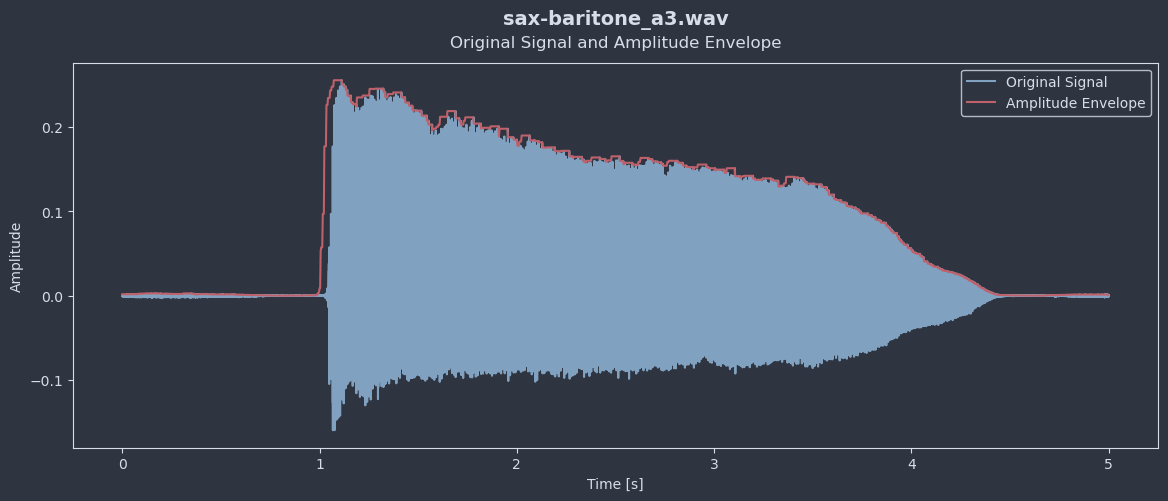

2024-08-04 20:40:06,948 - INFO: Plot saved to: ./local_data/output_graphs/AE_sax-baritone_a3.png


In [11]:
# Function to ensure the directory exists
def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Plot the original signal and Amplitude Envelope
logging.info("Plotting the original signal and amplitude envelope")
fig, ax = plt.subplots(figsize=(14, 5))

# Set background color
fig.patch.set_facecolor('#2E3440')

# Extract the file name from the file path
file_name = os.path.basename(audio_file_path)
file_base_name, _ = os.path.splitext(file_name)

# Plot the original signal and amplitude envelope
ax.plot(time, y, color='#81A1C1', label='Original Signal')  # Full wave color
ax.plot(t_frames, amplitude_envelope, color='#BF616A', label='Amplitude Envelope')  # Amplitude envelope color

# Add the song title in bold and the subtitle below it
title = file_name
subtitle = "Original Signal and Amplitude Envelope"

# Title with mixed font weights (for readablity)
ax.text(0.5, 1.10, title, transform=ax.transAxes, fontsize=14, fontweight='bold', color='#D8DEE9', ha='center')
ax.text(0.5, 1.04, subtitle, transform=ax.transAxes, fontsize=12, fontweight='normal', color='#D8DEE9', ha='center')

# Set titles and labels
ax.set_xlabel('Time [s]', color='#D8DEE9')
ax.set_ylabel('Amplitude', color='#D8DEE9')

# Set the axes background color
ax.set_facecolor('#2E3440')

# Set the axes spine color
ax.spines['bottom'].set_color('#D8DEE9')
ax.spines['top'].set_color('#D8DEE9')
ax.spines['right'].set_color('#D8DEE9')
ax.spines['left'].set_color('#D8DEE9')

# Set the tick parameters color
ax.tick_params(axis='x', colors='#D8DEE9')
ax.tick_params(axis='y', colors='#D8DEE9')

# Customize the legend
legend = ax.legend(facecolor='#2E3440', edgecolor='#D8DEE9', labelcolor='#D8DEE9')
for text in legend.get_texts():
    text.set_color('#D8DEE9')

# Ensure the output directory exists
output_directory = './local_data/output_graphs'
ensure_directory(output_directory)

# Save the plot
output_path = os.path.join(output_directory, f'AE_{file_base_name}.png')
plt.savefig(output_path, facecolor='#2E3440')

# Show the plot
plt.show()

# Log the saved plot location
logging.info(f"Plot saved to: {output_path}")